In [1]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_call_price(S0=100, K=105, T=1.0, r=0.02, sigma=0.25,
                           n_sims=100000, n_steps=252, seed=42):
    np.random.seed(seed)
    dt = T / n_steps

    # Preallocate and simulate
    Z = np.random.normal(0, 1, (n_sims, n_steps))
    increments = (r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z
    log_paths = np.cumsum(increments, axis=1)
    ST = S0 * np.exp(log_paths[:, -1])   # final price

    payoff = np.maximum(ST - K, 0)
    discounted = np.exp(-r * T) * payoff
    price = np.mean(discounted)

    # Estimate standard error
    stderr = np.std(discounted) / np.sqrt(n_sims)
    ci_low, ci_high = price - 1.96 * stderr, price + 1.96 * stderr
    return price, (ci_low, ci_high), ST


In [2]:
price, ci, ST = monte_carlo_call_price()
print(f"Monte Carlo Call Price ≈ {price:.4f}")
print(f"95% Confidence Interval: [{ci[0]:.4f}, {ci[1]:.4f}]")


Monte Carlo Call Price ≈ 8.6307
95% Confidence Interval: [8.5320, 8.7294]


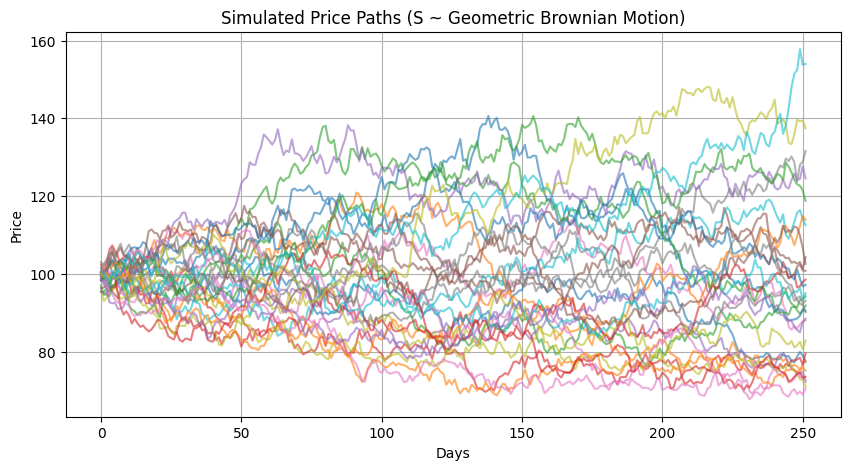

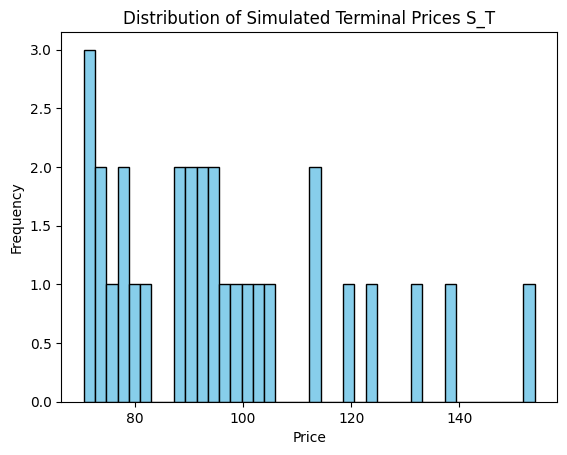

In [3]:
def visualize_paths(S0=100, sigma=0.25, r=0.02, T=1, n_sims=30, n_steps=252):
    dt = T / n_steps
    Z = np.random.normal(0, 1, (n_sims, n_steps))
    increments = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    log_paths = np.cumsum(increments, axis=1)
    S = S0 * np.exp(log_paths)

    plt.figure(figsize=(10,5))
    plt.plot(S.T, alpha=0.6)
    plt.title("Simulated Price Paths (S ~ Geometric Brownian Motion)")
    plt.xlabel("Days"); plt.ylabel("Price"); plt.grid(True); plt.show()

    plt.hist(S[:,-1], bins=40, color='skyblue', edgecolor='k')
    plt.title("Distribution of Simulated Terminal Prices S_T")
    plt.xlabel("Price"); plt.ylabel("Frequency"); plt.show()

visualize_paths()
